# Graph Theory Questions for Jupyter-based Exam

## Instructions
1. You may use any source of information you can find, so long as you don't communicate with anyone else.
2. You can put your answers in the marked cells; please first answer with markdown and then with code.
3. You can split up your code answers into multiple cells if you like, but keep them in order for me to grade!
4. You have 90 minutes total for the exam (unless you are eligible for "Special Facilities"), distribute it wisely amongst questions.
5. Remember you can look up the documentation of any function or object by appending "?" (question mark) to it without calling it with "()"; this is the same documentation as you'd look up on the internet! See an example in the next cell.
6. Your final grade will be `score / 70 * 9 + 1`


In [ ]:
nx.Graph?

# -- BEGIN EXAM --
Good luck!
*Don't forget to run the global imports defined in the next cell!!!*

In [2]:
# Global definitions you will need are here; RUN THIS CELL
# Define any extra global modules you want to add yourself here as well!
# As well as any extra helper functions you want to use in all exercises below.
import networkx as nx
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 (7pt)

1. What is the definition of a "cycle"?
2. Given a simple, undirected graph without self-loops, what is the size of the smallest cycle possible?
3. Given a simple, undirected graph *with* self-loops, what is the size of the smallest cycle possible?
4. Given a simple, directed graph without self-loops, what is the size of the smallest cycle possible?
5. Given a simple, undirected bipartite graph, what is the size of the smallest cycle possible?
6. Given a complete graph, what is the size of the smallest cycle?
7. Explain what the following means: $N(v) = {w \in V(G) | v \neq w, \exists e \in E(G) : e = (w, v)}$

### Text Markdown answers to question 1


In [ ]:
## Code Answers to question 1
#1. it is a non-empty trail in which only the first and last vertices are equal
#2.3
#3.1
#4.2
#5.4
#6.3
#7. definition of the adjacent node of the vertex (neighbor)


## Question 2 (21pt)
A citation graph is a DiGraph consisting of papers as nodes, and citations as edges. An edge will point from paper A to paper B iff paper A cites paper B.

An author's h-index is defined as the maximum value of $h$ such that the given author/journal has published at least $h$ papers that have each been cited at least $h$ times.

1. Read in the DiGraph in the file `citation_graph.json`. It is in node-link format. Nodes represent papers. Each node (paper) has an `'AuthIds'` attribute, which is a list of that paper's authors. If you are unable to read in the graph, use the following bit of code:
```python
import pickle
with open('citation_graph.pickle', 'rb') as jar:
        citation_graph = pickle.load(jar) 
```
2. Is this DiGraph a DAG, and why should/shouldn't it be?
3. What is the most cited paper?
4. What is the most cited author?
3. Write a function that calculates the h-index for authors. Which author has the highest h-index?

### Text Markdown Answers to Question 2


In [55]:
## Code Answers to Question 2
from networkx.readwrite import json_graph

def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

G = read_json_file('citation_graph.json')


In [78]:
# print(G.nodes(data=True))
print(nx.is_directed_acyclic_graph(G))
# is not dag and it shouldn't
indegrees = sorted(list(G.in_degree(G.nodes)), key=lambda a: a[1], reverse=True)
# print(G.nodes['0.0'])
# print(G.nodes['5EFE608F'])
# print(G.nodes['5EFE608F']['AuthIds'])
print('most citated paper', indegrees[0])

authors = {}
#init
for node in G.nodes:
    for a in G.nodes[node]['AuthIds']:
        authors[a] = 0
        

for node in G.nodes:
    indegree=G.in_degree(node)
    for a in G.nodes[node]['AuthIds']:
        authors[a]+=1
        
# print(authors)
res = sorted(authors, key=authors.get, reverse=True)
print('most citated author', res[0])

False
most citated paper ('13DFA56F', 309)
0.0


## Question 3 (21pt)
For the book Les Miserable someone counted how often pairs of characters appeared in the same scene. This can of course be represented as a graph where nodes are characters, and there is an edge between 2 characters if they appear in the same scene. In addition, the edges can be weighted by how many scenes they share.

We'll investigate who the central characters in this story are. One measure you could use is the *betweenness centrality*. This is defined as follows:
> Let $G$ be a simple, connected graph. Let $S(x, y)$ be the set of shortest paths between two vertices $x, y \in V(G)$, and $S(x, u, y) \subseteq S(x,y)$ the ones that pass through node $u \in V(G)$. The *betweenness centrality* $c_B(u)$ of node $u$ is defined as: $$c_B(u) = \sum_{x \neq y} \frac{|S(x, u, y)|}{|S(x, y)|}$$

1. Explain in your own words what the betweenness centrality means.
2. What other measures, besides the betweenness centrality, could you use to find the main character(s)?
3. Load the graph in the file `les_miserables.graphml`. The file is in GraphML format. If you are unable to read in the file, use the following snippet of code: 
```python
graph = nx.les_miserables_graph()
```
4. Find the 5 most important characters. Use the betweenness centrality (use an existing implementation), and at least one other measure you can think of. Do your chosen metrics agree with eachother? Why (not)?

### Text Markdown Answers to Question 3


In [44]:
## Code answers to Question 3
#To calculate betweenness centrality, you take every pair of the network and count how many times a node 
# can interrupt the shortest paths (geodesic distance) between the two nodes of the pair. It assumes that 
# important nodes connect other nodes. 
# I could use the closeness centrality or find the centrality of the nodes using the formula 1/eccentricity
from networkx.algorithms.distance_measures import center
import numpy as np
graph = nx.read_graphml('les_miserables(1).graphml')
# print(graph.nodes)

bet_centrality = nx.betweenness_centrality(graph, normalized = False, 
                                              endpoints = False)
print("betweenness_centrality", sorted(bet_centrality, key=bet_centrality.get, reverse=True)[:5])

for w in sorted(bet_centrality, key=bet_centrality.get, reverse=True)[:5]:
    print(w, bet_centrality[w])
    
close_centrality = nx.closeness_centrality(graph, distance='weight')
print("closeness_centrality", sorted(close_centrality, key=close_centrality.get, reverse=True)[:5])

cetralities = {}
for n in graph.nodes:
    cetralities[n] = 1/nx.eccentricity(graph, n, weight='weight')
manual_centrality = sorted(cetralities, key=bet_centrality.get, reverse=True)[:5]
print("manual_centrality", manual_centrality)

#betweenness_centrality agrees with the manual centrality (calculated by formula 1/eccentricity), but does not agree
# with the closeness_centrality. Why? betweenness_centrality does not use weights, closeness_centrality uses.
# Closeness centrality is a measure of the average shortest distance from each vertex to each other vertex.

betweenness_centrality ['Valjean', 'Myriel', 'Gavroche', 'Marius', 'Fantine']
Valjean 1624.4688004333127
Myriel 504.0
Gavroche 470.57063191366586
Marius 376.2925925725461
Fantine 369.4869418163536
closeness_centrality ['Gavroche', 'Valjean', 'Montparnasse', 'Javert', 'Gueulemer']
manual_centrality ['Valjean', 'Myriel', 'Gavroche', 'Marius', 'Fantine']


## Question 4 (21pt)
Given a number of nodes you can create a random graph by randomly adding edges between those nodes. This is also known as an Erdős–Rényi random graph, or gnp graph. You can generate such a graph using the networkx function `nx.fast_gnp_random_graph`. 

We will investigate the following statement: Almost every graph in $G(n, \frac{2 ln(n)}{n})$ is connected, where $n$ is the number of nodes, and $\frac{2ln(n)}{n}$ the chance that any 2 nodes are connected.

1. What does it mean for a graph to be "connected"?
2. Take `n = 100` and `p = 0.02`. Generate the corresponding gnp graph. What is the size of largest connected component in that graph?
3. Given a fixed value for n (e.g. 100), plot the size of the largest connected component as a function of p. Do you find the given statement to be correct?

Hint: use something like `plt.plot(p_values, sizes)` to make the plot.

### Text Markdown Answers to Question 4


In [9]:
## Code answers to Question 4
# connected graph - a graph where there is a path from any point to any other point in the graph
g = nx.fast_gnp_random_graph(100, 0.02)
print(nx.is_connected(g))
lens = [len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)]
print(lens[0])

False
77


0.09210340371976183
False
False
False
False
False
True
True
True
False
True
True
True
True
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13]


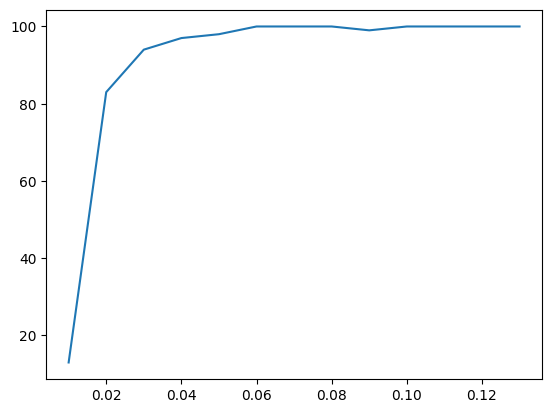

In [28]:
import math
n = 100 #const
def build_graph(p):
    g = nx.fast_gnp_random_graph(n, p)
    print(nx.is_connected(g))
    return len(sorted(nx.connected_components(g), key=len, reverse=True)[0])

l = (2*math.log(n))/n
print(l)
# start, stop, step
p_values = np.arange(0.01, l*1.5, 0.01)
sizes = [build_graph(p) for p in p_values]

plt.plot(p_values, sizes)
print(p_values)

# i do agree with the statement


# --- END OF EXAM ---
Congrats, you made it to the end of the exam! Don't forget to rename your ipynb to "GTExam_YOUR_NAME_STUDENTNR.ipynb" and hand it in via BlackBoard submit!